# Libraries

Import your libraries

In [1]:
import numpy as np
import pandas as pd
import statistics as cal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix

# Importing Data

Import the CSV file with Actions, Sum and Div as a Dataframe called df. Fill the empty values of Action with 0. 
Replace NaN values with 0. Delete first 100 rows. 

In [2]:
#load in df
Player = 9 
Game = 2

df = pd.read_csv('matrix_Player_' + str(Player) + '_game_' + str(Game) + '_Action.csv')

# Fill NaN with 0
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

#Convert Sprinting to 1
df.Action[df.Action == "Sprinting"] = 1

#Delete first 99 rows, so df starts at timeLine == 1.00
df = df.iloc[99: , :]

/opt/jupyterhub/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-2-831780be6f08>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Action[df.Action == "Sprinting"] = 1


# Preparing Data

Split the Dataframe in chunks van n/100 seconden. Combine to 1 dataframe. With Sum,Div and Action split into Train and Valid/Test. 

In [3]:
#Convert data into chunks of a second
n = 50 #chunk size (100 datapoints in one second)
chunks = [df[i:i+n] for i in range(0,df.shape[0],n)]

#Set chunks into dataframe
#for chunk in chunks:
frames = []
for chunk in chunks:
    P = pd.DataFrame({'Frames':[chunk['Unnamed: 0'].tolist()], 'frAcc':[max(chunk['frAcc'].tolist())], 
                      'frRoAcc':[chunk['frRoAcc'].tolist()], 'frDispl':[chunk['frDispl'].tolist()], 
                      'frRoAng':[chunk['frRoAng'].tolist()], 'frSpeed':[chunk['frSpeed'].tolist()], 
                      'timeLine':[chunk['timeLine'].tolist()], 'frameRotationalSpeedX':[chunk['frameRotationalSpeedX'].tolist()], 
                      'frameRotationalSpeedY':[chunk['frameRotationalSpeedY'].tolist()], 'frameRotationalSpeedZ':[chunk['frameRotationalSpeedZ'].tolist()],
                      'wheelRotationalSpeedX':[max(chunk['wheelRotationalSpeedX'].tolist())], 'wheelRotationalSpeedY':[chunk['wheelRotationalSpeedY'].tolist()],
                      'wheelRotationalSpeedZ':[chunk['wheelRotationalSpeedZ'].tolist()], 'frRoSpeed':[max(chunk['frRoSpeed'].tolist())],
                      'Sum_WheelX_FrameZ':[max(chunk['Sum_WheelX_FrameZ'].tolist())], 'Div_FrameZ_WheelX':[cal.mean(chunk['Div_FrameZ_WheelX'].tolist())],
                      'Action':[max(chunk['Action'].tolist())]})
    frames.append(P)

df = pd.concat(frames,ignore_index=True)

In [4]:
# split chunk data into train test validate (with colum [sum and Div] as input, and action as output)
X_train, X_test, y_train, y_test = train_test_split(df[['wheelRotationalSpeedX', 'Sum_WheelX_FrameZ',  'Div_FrameZ_WheelX']], 
                                                    df.Action, test_size = 0.2, random_state=42)

#plt.plot(X_train[''])
#y_train =y_train.astype('int')
#y_test =y_test.astype('int')

# Fitting Model

Choose a classification model. Train model with Training data.

In [30]:
model1 = KNeighborsClassifier(n_neighbors=8)
model2 = DecisionTreeClassifier(random_state = 42, max_depth = 1, min_samples_leaf = 0.04 , max_features = 0.2)
#model3 = SVC(kernel = 'linear', gamma= 1e-05)
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
#model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, max_features=0.2, min_samples_leaf=0.04,
                       random_state=42)

# preparing model for gridsearch


In [23]:
knn = DecisionTreeClassifier(random_state=42)#SVC(kernel = 'linear')
# creating an array for different n_neighbours parameter
param_grid  = {'max_depth': [1, 2, 3, 4, 5, 6] , 'min_samples_leaf': [0.04, 0.06, 0.08], 'max_features': [0.2, 0.4, 0.6, 0.8]} #{'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,1]}


# creating for loop 
in this part we find he best parameters for the neighbours classifier model


In [36]:
#knn_cv = []

#for i in range(10):
knn_cv = GridSearchCV(knn,param_grid)
knn_cv = knn_cv.fit(X_train,y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)
print("Test accuracy of best grid search hypers:", knn_cv.score(X_test, y_test))

{'max_depth': 1, 'max_features': 0.2, 'min_samples_leaf': 0.04}
0.9891430737468372
Test accuracy of best grid search hypers: 0.9913821677162744


In [ ]:
#print(knn_cv.best_params_)

# Validate/Tune Model

Validate results of the model (Precision/Recall). Tune the parameters of the model to achieve better results

0.9913821677162744
[[2991    0]
 [  26    0]]


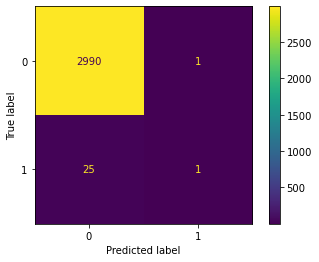

In [38]:
#GridsearchCV Polynomials
#plt.plot(model3)
y_predict = model2.predict(X_test)
#if y_predict == 1:
 #   print(y_predict)

    
print(accuracy_score(y_test,y_predict))
    
    
matrix = confusion_matrix(y_test , y_predict)
print(matrix)
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

# Export Data

Export the results in CSV format. Layout = Time,Action

In [ ]:
y_train.head()